# CoF<sub>2</sub>
In this example we show how to calculate the field at the known muon site in the Néel antiferromagnetic insulator CoF<sub>2</sub>

In [3]:
import numpy as np
from muesr.engines.clfc import locfield # Does the sum and returns the results
from muesr.core import Sample           # The object that contains the information
from muesr.engines.clfc import find_largest_sphere # A sphere centered at the muon is the correct summation domain
from muesr.i_o import load_cif          # To load crystal structure information from a cif file
from muesr.utilities import mago_add, show_structure # To define the magnetic structure and show it
import matplotlib.pyplot as P           
np.set_printoptions(suppress=True,precision=4)       # to set displayed decimals in results

	 Spg Library not loaded


You can find all relevant MuSR information of this compound 
in <a href="https://doi.org/10.1103/PhysRevB.30.186">Phys. Rev. B 30 186</a></center>.

Now define a sample object (call it cof for short) and load the lattice structure from a cif file 
(present in the muesr distribution). Finally add the known muons site in fractional cell coordinates 
(it sits in the middle of the  a axis).

In [6]:
cof = Sample()
load_cif(cof,"./CoF2.cif")
cof.add_muon([0.5,0.0,0.0]) # Checked experimentally by single crystal studies in external field

In [ ]:
<center> <b> Here is the magnetic structure of CoF<sub>2</sub> </b> <a href="https://doi.org/10.1103/PhysRevB.30.186">PRB 30 186</a></center>
![title](CoF2.png)

Now define a new magnetic structure (you can have more than one). 
Define its propagation vector <i><b>k</b></i>, equal to the c lattice vector, 
(but the a, or the b lattice vector would equally do, and k=0 as well)

The next step will be to input one complex Fourier component per atom, by the command cof.mm.fc 
You must know the order in which the atoms are presented (mago_add could be useful here, check)
Here the situation is clarified by the code comments below.

In [7]:
# magnetic moment of 2.6 muB from https:doi.//org/10.1103/PhysRevB.87.121108  https://doi.org/10.1103/PhysRevB.69.014417
cof.new_mm()     
cof.mm.k=np.array([0.0,0.0,1.0])
# according to CoF2.cif (setting with a,b equal, c shorter, type cif to check)
# H-M P4_2/mnm group 136, six atoms in the cell, in this order
# Co at 0.00000 0.00000 0.00000 (2b site)  
# the symmetry replica is generated at 0.5000 0.5000 0.5000
# http://www.cryst.ehu.es/cgi-bin/cryst/programs/nph-normsets?&norgens=&gnum=136 
# F at 0.30600 0.30600 0.00000  (4f site)
# the symmetry replicas are generated at 1--x 1-x 0, 0.5+x 0.5-x, 0.5, 0.5-x,0.5+x, 0.5
cof.mm.fc= np.array([[0.0+0.j, 0.0+0.j, 2.6+0.j],[0.0+0.j, 0.0+0.j, -2.6+0.j], # the two Co with opposite m
                    [0.0+0.j, 0.0+0.j, 0.0+0.j],[0.0+0.j, 0.0+0.j, 0.0+0.j],   # F
                    [0.0+0.j, 0.0+0.j, 0.0+0.j],[0.0+0.j, 0.0+0.j, 0.0+0.j]])  # F

Let us see if we did that right: invoke VESTA 
(you must have it installed and its location known to muesr, see Installation). And remember to kill VESTA to proceed. 

In [8]:
show_structure(cof,visualizationTool='V') # show_structure(cof,supercell=[1,1,2],visualizationTool='V')

True

CoF<sub>2</sub> does not have a contact hyperfine term, by symmetry, nor a macroscopic magnetization to produce a demagnetizing field, 
being an antiferromagnet. We can just proceed to calculate the dipolar sums. 
Let us do that over a pretty large spherical summation domain.

In [10]:
n=100
radius=find_largest_sphere(cof,[n,n,n]) 
r=locfield(cof, 's', [n, n, n] ,radius)
print('Compare Bdip = {:.4f} T with the experimental value of Bexp = 0.265 T'.format(np.linalg.norm(r[0].D,axis=0)))

Compare Bdip = 0.2614 T with the experimental value of Bexp = 0.265 T


The small 1.4% difference may be due to the muon pushing slightly ot the nearest neighbor Co ions. 
Now let us check the convergence and plot it

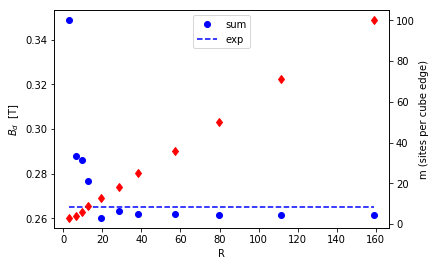

In [11]:
npoints = 11
n = np.logspace(0.53,2,npoints,dtype=int)
k = -1
B_dip = np.zeros(npoints)
R = np.zeros(npoints)
for m in n:
    k += 1
    radius=find_largest_sphere(cof,[m,m,m])
    r=locfield(cof, 's', [m, m, m] ,radius) #
    R[k] = radius
    B_dip[k] = np.linalg.norm(r[0].D,axis=0)

fig,ax = P.subplots()

ax.plot(R,B_dip,'bo',label='sum')
ax.plot(R,R-R+0.265,'b--',label='exp')
ax1 = ax.twinx()
ax.set_xlabel('R')
ax.set_ylabel(r'$B_d$  [T]')
ax1.plot(R,n,'rd')
ax1.set_ylabel('m (sites per cube edge)')
ax.legend(loc=9)
P.show()

Compare with 
![title](examples_CoF2_CoF2_11_0.png)